# Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}



### Numerical Solutions
\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(y)}=\left[ \begin{array}{c} f_{1}(\bf{y}) \\ f_{2}(\bf{y})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad i=1,2,3,...,N
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2,3,...,N
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix therefore we have to solve for $\Delta x$:

\begin{equation}
\Delta {\bf{x}}=-\bf{f}* F'^{-1}
\end{equation}
Therefore with the $\Delta x$ found, the initial guesses can be adjusted:
$$x_{1} =x_{1} + \Delta x_1 $$
$$x_{2} =x_{2} + \Delta x_2 $$

### Function definition 
First we define our functions:

In [1]:
%matplotlib notebook
import numpy as np

def f1(x1,x2):
    return x1**2 + x1*x2-10

def f2(x1,x2):
    return x2 + 3*x1*(x2**2)-57


### Function Graphs
We take the values of the two functions and subtract them. At  ($x_{1},x_{2}$)  the value of this subtracted function should be zero due to the original functions having the same value

In [2]:
x1t = np.arange(-3,5,0.5)
x2t = np.arange(-3,5,0.5)
x1t, x2t = np.meshgrid(x1t, x2t)
Z1 = f1(x1t,x2t)
Z2 = f2(x1t,x2t)
Z3 = Z2 - Z1

<IPython.core.display.Javascript object>


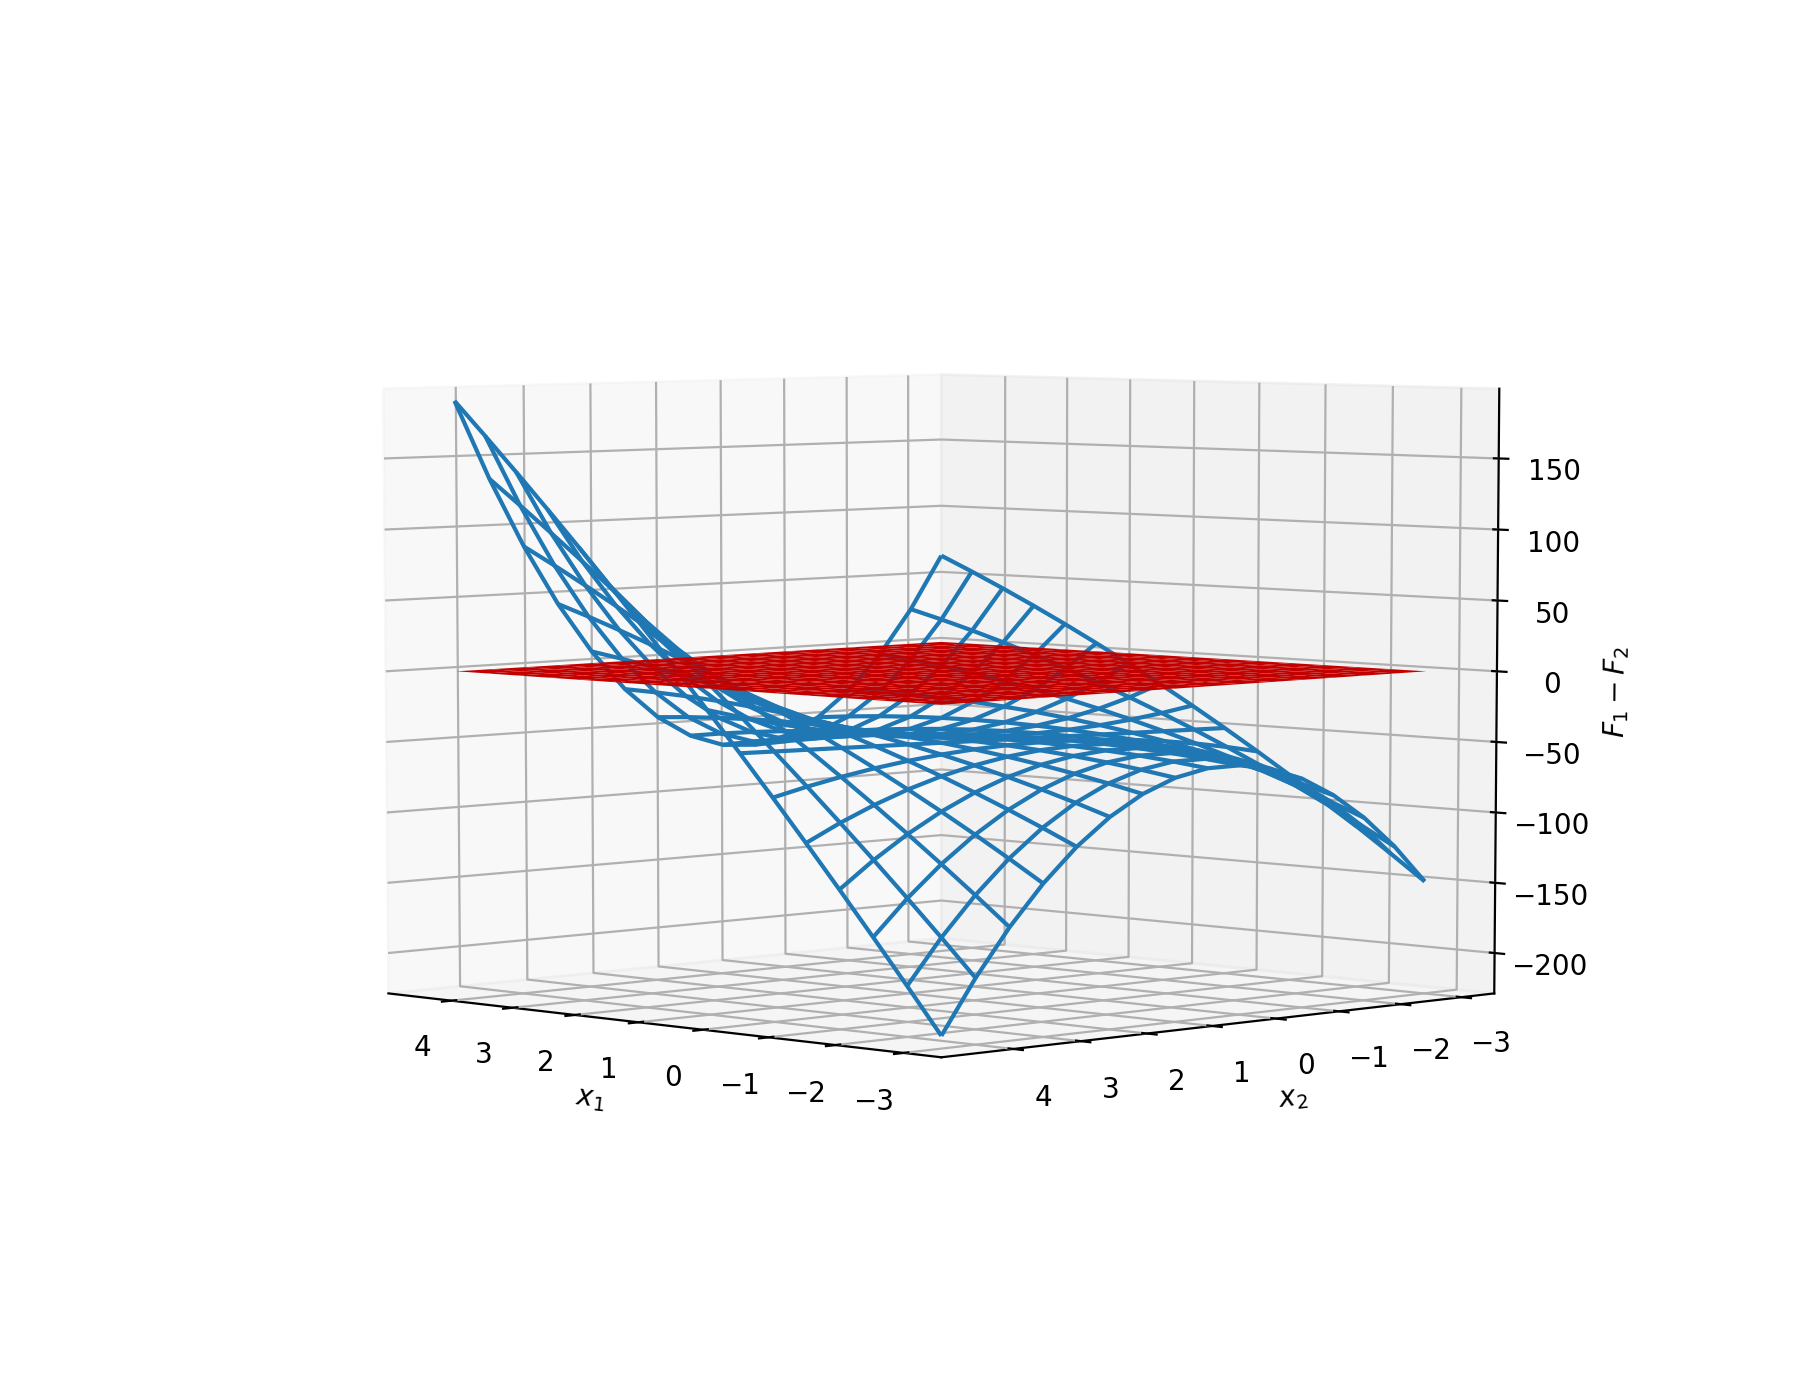

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
Z0=0*x1t+0*x2t    #flat plane (z=0)


Axes3D.plot_wireframe(ax,x1t, x2t, Z3)
Axes3D.plot_surface(ax,x1t, x2t, Z0,color="red")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$F_1-F_2$')
ax.view_init(elev=5 ,azim=135)

### Graph Analysis
As we can see, there seems to be 2 sets of anwsers for this system of equations, depending on our first random guess, either one of these anwsers can be viable.
$$(x_1,x_2) = (2,3) $$


$$(x_1,x_2) = (4.394,-2.118) $$

### Newton Raphson coding for solving equations
Since we can anaylitically find the partial derivatives for our jacobian matrix, we do so:
\begin{equation}
\begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}=
\begin{bmatrix} 2x_1+x_2 & x_1  \\ 3x_2 ^ {2} & 1+6x_1x_2 \end{bmatrix}
\end{equation}
We aim to solve:
\begin{equation}
\Delta {\bf{x}}=-\bf{f}* F'^{-1}
\end{equation}

In [38]:
def newtonraphson(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  #these are the analytical derivatives 
        negf = np.array([-f1(x10,x20),-f2(x10,x20)]) #This is the negatice of our matrix function


        dfinv = np.linalg.inv(df)  # this is inverse of our jacobian(derivative) function
        
        xs1 = np.dot(negf,dfinv)  #this dot product results in our delta-x matrix
        
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            print("Root is at {0:.5f} and {1:.5f} after {2:.2f} iterations, with a precision of {3:.15f} with a function value of {4:.15f}.".format(x10,x20,i,eps,f1(x10,x20)))
            return
            break
    
            
    return [x10,x20,f1(x10,x20)]

In [39]:
newtonraphson(1,1,500,10**(-13),f1)

Root is at 4.39374 and -2.11778 after 68.00 iterations, with a precision of 0.000000000000100 with a function value of -0.000000000000060.


We seem to have found one set of the anwsers but lets search for the other:

In [12]:
def newtonraphson(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  #these are the analytical derivatives 
        negf = np.array([-f1(x10,x20),-f2(x10,x20)]) #This is the negatice of our matrix function


        dfinv = np.linalg.inv(df)  # this is inverse of our jacobian(derivative) function
        
        xs1 = np.dot(negf,dfinv)  #this dot product results in our delta-x matrix
        
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            #print("Root is at {0:.5f} and {1:.5f} after {2:.2f} iterations, with a precision of {3:.15f} with a function value of {4:.15f}.".format(x10,x20,i,eps,f1(x10,x20)))
            return [x10,x20,f1(x10,x20)]
            break
    
            
    return [0,0,0]

In [37]:
import random 
#xT = []
for i in np.arange(0,5,0.1):
    for j in np.arange(-3,4,0.1):
        xT=newtonraphson(i,j,300,10**(-5),f1)
        if(2.1>xT[0]>1.9 and 2.9<xT[1]<3.1):
            print(xT)
            print("Starting guess:",i,"and",j)

[2.0000000000000244, 2.9999999999999987, 1.6697754290362354e-13]
Starting guess: 2.0 and 3.0000000000000053


As we can see, only 1 guess from the ranges [-5,5] results in the other set of anwsers being (2,3) meaning the code is highly functioned to stear towards one anwser. lets try to fix this. 

### Newton Raphson BackTracking

In [33]:
  def newtonraphson2(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  
        negf = np.array([-f1(x10,x20),-f2(x10,x20)])
        
        dfinv = np.linalg.inv(df)

        xs1 = np.dot(negf,dfinv)
        
        while (abs(f1(x10+xs1[0],x20+xs1[1]))>abs(f1(x10,x20))):
            xs1=xs1/2
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            #print("Root is at",x10,x20," after ",i," iterations, with a precision of ",abs(f1(x10,x20)),f2(x10,x20))
            return [x10,x20,f1(x10,x20)]
            break
            
    return [x10,x20,f1(x10,x20)]


In [36]:
import random 
#xT = []
for i in np.arange(0,5,0.1):
    for j in np.arange(-3,4,0.1):
        xT=newtonraphson2(i,j,300,10**(-5),f1)
        if(2.1>xT[0]>1.9 and 2.9<xT[1]<3.1):
            print(xT)
            print("Starting guess:",i,"and",j)
            print('\n')

[1.9000000000000001, 2.9000000000000057, -0.8799999999999883]
Starting guess: 1.9000000000000001 and 2.9000000000000057


[1.9000000000000001, 3.0000000000000053, -0.6899999999999888]
Starting guess: 1.9000000000000001 and 3.0000000000000053


[2.0108693466823957, 3.082136715500923, 0.24136977291205142]
Starting guess: 1.9000000000000001 and 3.100000000000005


[2.0, 2.9000000000000057, -0.19999999999998863]
Starting guess: 2.0 and 2.9000000000000057


[2.0, 3.0000000000000053, 1.0658141036401503e-14]
Starting guess: 2.0 and 3.0000000000000053


[1.9900686252932671, 2.921027061451365, -0.2265825579964158]
Starting guess: 2.1 and 2.9000000000000057


[2.013116483465133, 3.0685648738061757, 0.23001650404034102]
Starting guess: 3.6 and 1.1000000000000032


[1.9954818677368336, 3.0226598621441245, 0.013610831710998639]
Starting guess: 3.7 and 1.1000000000000032


[1.998165741113023, 2.977928197610577, -0.056939567082336495]
Starting guess: 3.8000000000000003 and 1.1000000000000032


[1.949

### Newton Raphson Back tracking Analysis

As we can see, with the back tracking method, we get more of the second result with the same set of initial guesses. The downside to the backtracking method is more computing power and time consumption to run the 2 for loops but if one wants to make a educated guess based on the graph, this algorithm proves better. 